### Review of Parameter tunning using cross_val_score
### Goal: finding best k for knn algo

In [24]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt

In [25]:
dataframe=pd.read_csv("Iris.csv",index_col=0)


In [26]:
dataframe_map={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
dataframe['Species']=dataframe['Species'].map(dataframe_map)

In [27]:
array=dataframe.values
X=array[:,0:4]
y=array[:,4]
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.])

In [28]:
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')

In [29]:
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [47]:
k_range=range(1,31)
print(k_range)
k_scores=[]

range(1, 31)


In [31]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    value=(cross_val_score(knn,X,y,cv=10,scoring='accuracy')).mean()
    k_scores.append(value)
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


In [32]:
%matplotlib inline

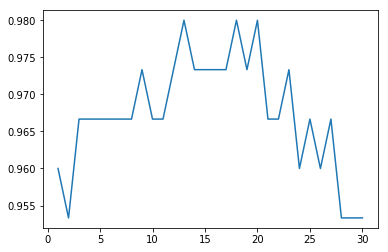

In [33]:
plt.plot(k_range,k_scores)


## More efficient parameter Tuning using GridSearchCV


In [39]:
from sklearn.grid_search import GridSearchCV

In [44]:
k_range=np.arange(1,31)
k_scores=[]

In [45]:
parma_grid=dict(n_neighbors=k_range)
print(parma_grid)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])}


In [46]:
grid=GridSearchCV(knn,parma_grid,cv=10,scoring='accuracy')

In [48]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [58]:
print(grid.best_score_)

0.98


In [49]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [52]:
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [54]:
all_mean_scores=[x.mean_validation_score for x in grid.grid_scores_]

In [55]:
print(all_mean_scores)

[0.96, 0.9533333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.98, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.96, 0.9666666666666667, 0.96, 0.9666666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


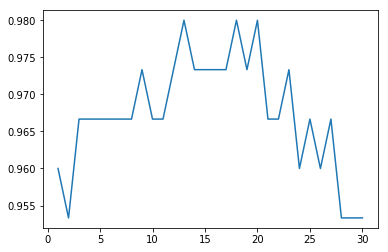

In [56]:
plt.plot(k_range,all_mean_scores)

In [57]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
{'n_neighbors': 13}
0.98


# Searching Multiple parameter simultinously

In [59]:
k_range=np.arange(1,31)
weight_options=['uniform','distance']
param_grid=dict(n_neighbors=k_range,weights=weight_options)

In [60]:
print(param_grid)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), 'weights': ['uniform', 'distance']}


In [61]:
grid=GridSearchCV(knn,param_grid=param_grid,cv=10,scoring='accuracy')

In [62]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [63]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [64]:
grid.best_score_

0.98

In [66]:
print(grid.best_params_)

{'n_neighbors': 13, 'weights': 'uniform'}


# Using the Best paramenter to make prediction

In [67]:
knn=KNeighborsClassifier(n_neighbors=13,weights='uniform')
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [69]:
knn.predict([[3,5,4,2],[3,4,5,2]])

array([ 1.,  1.])

In [71]:
# uporer block gula jei kaj provide kore sei gula gird object akline a korte sokkhom
grid.predict([[3,5,4,2]])

array([ 1.])

# Reducing Computational expence using RendomizedSearchCV
- Searching many different parameters at a same time may occourp computationaly infisible
- RadomizedSearchCV search a subset of parameters and you can control the computational 'budget'

In [72]:
from sklearn.grid_search import RandomizedSearchCV

In [73]:
# sapcify parameter distribution rather than a parameter grid
param_dist=dict(n_neighbors=k_range,weights=weight_options)

In [75]:
# n_iter control the number of search
rand=RandomizedSearchCV(knn,param_distributions=param_dist,cv=10,scoring='accuracy',n_iter=10)
rand.fit(X,y)
rand.grid_scores_

[mean: 0.96667, std: 0.03333, params: {'weights': 'uniform', 'n_neighbors': 25},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 27},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 3},
 mean: 0.96000, std: 0.04422, params: {'weights': 'uniform', 'n_neighbors': 24},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 26},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 11},
 mean: 0.98000, std: 0.03055, params: {'weights': 'uniform', 'n_neighbors': 18},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 9},
 mean: 0.96667, std: 0.03333, params: {'weights': 'distance', 'n_neighbors': 30},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 5}]

In [76]:
# examine the best model
rand.best_score_

0.98

In [78]:
rand.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')

In [79]:
rand.best_params_

{'n_neighbors': 18, 'weights': 'uniform'}

In [80]:
# run the randomized search 20 time(with n_iter = 10) to store the best score
best_scores=[]
for _ in range(20):
        rand=RandomizedSearchCV(knn,param_distributions=param_dist,cv=10,scoring='accuracy',n_iter=10)
        rand.fit(X,y)
        best_scores.append(round(rand.best_score_,3))
print(best_scores)

[0.98, 0.973, 0.98, 0.973, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.973, 0.98, 0.98, 0.973, 0.98, 0.98, 0.98, 0.98]
